In [12]:
from agentpy import DataDict
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Load Data

In [22]:
data = DataDict.load(exp_name='pos_discrim_pos_premium', exp_id=1, path='../data')
# data = DataDict.load(exp_name='pos_discrim_zero_premium', exp_id=1, path='../data')

wdf = data.variables.Worker.reset_index()
fdf = data.variables.Firm.reset_index()

wdf['wage_diff'] = wdf['prod'] - wdf['wage']
wdf['wage_div'] = wdf['wage'] / wdf['prod']
wdf_fnl = wdf.loc[(wdf['t'] == fdf['t'].max())]
wdf_fnl['educ_cat'] = wdf_fnl['educ'].astype(int)

fdf_fnl_actv = fdf.loc[(fdf['t'] == fdf['t'].max()) & (fdf['size'] > 0)]
fdf_fnl_actv['prop_class'] = fdf_fnl_actv['size_1'] / fdf_fnl_actv['size']

Loading from directory ../data/pos_discrim_pos_premium_1/
Loading variables_Worker.csv - Successful
Loading parameters_constants.json - Successful
Loading variables_Firm.csv - Successful
Loading reporters.csv - Successful
Loading info.json - Successful


/var/folders/j_/p28zw__n52g6yjt754l8zdw00000gn/T/ipykernel_63875/3112392068.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf_fnl['educ_cat'] = wdf_fnl['educ'].astype(int)
/var/folders/j_/p28zw__n52g6yjt754l8zdw00000gn/T/ipykernel_63875/3112392068.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf_fnl_actv['prop_class'] = fdf_fnl_actv['size_1'] / fdf_fnl_actv['size']


### Wage Discrimination Over Time

As the model progresses, workers search for a new job. When workers of Class 0 search for a job, they are always offered a wage equal to their MPL, which is equal to their current wage. Therefore, workers of Class 0 never switch firms. However, when workers of Class 1 search for a new job, they come into contact with firms of varying levels of discrimination. Firms with less discrimination offering wages closer to their MPL. If the wage is higher than their current wage, workers of Class 1 switch jobs. Over time, workers of Class 1 find the firms with the lowest discrimination factor, reducing the extent to which workers of Class 1 experience discrimination despite all of the potential for discrimination.

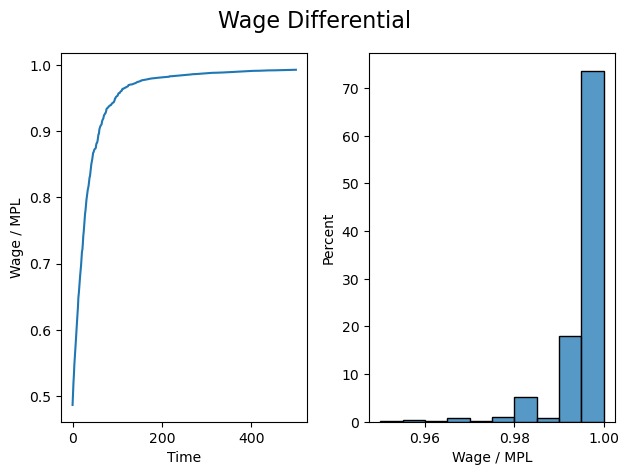

In [23]:
w_div = wdf.loc[wdf['d_class'] == 1].groupby(by=['t'])['wage_div'].mean().reset_index()

fig, ax = plt.subplots(1, 2)

# MPL / Wage
sns.lineplot(data=w_div, x='t', y='wage_div', ax=ax[0])
sns.histplot(data=wdf_fnl, x='wage_div', bins=10, stat='percent', ax=ax[1], legend=False)

# Axis Labels
ax[0].set_ylabel('Wage / MPL')
ax[0].set_xlabel('Time')
ax[1].set_xlabel('Wage / MPL')

# Figure Title
fig.suptitle('Wage Differential', fontsize=16)

plt.tight_layout()
plt.show()

In [24]:
X = wdf_fnl[['prod', 'd_class']]
# X = wdf_fnl[['educ_cat', 'd_class']]
# X = sm.add_constant(X)
y = wdf_fnl[['wage']]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wage   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.210e+07
Date:                Tue, 06 Feb 2024   Prob (F-statistic):                        0.00
Time:                        17:02:56   Log-Likelihood:                          987.06
No. Observations:                1000   AIC:                                     -1970.
Df Residuals:                     998   BIC:                                     -1960.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
wdf_fnl.groupby(by=['d_class'])['educ'].value_counts(normalize=True)

d_class  educ 
0        True     0.537678
         False    0.462322
1        False    0.609037
         True     0.390963
Name: proportion, dtype: float64